### DataScience Mini Project : Wine Quality Prediction
#### Wine DataSet Downloaded From UCI Dataset

Input variables (based on physicochemical tests):
1 - fixed acidity
2 - volatile acidity
3 - citric acid
4 - residual sugar
5 - chlorides
6 - free sulfur dioxide
7 - total sulfur dioxide
8 - density
9 - pH
10 - sulphates
11 - alcohol Output variable (based on sensory data):
12 - quality (score between 0 and 10)

** **

Above features can be described as follows:

   *  **fixed acidity** most acids involved with wine or fixed or nonvolatile (do not evaporate readily)
   *  **volatile acidity** the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste
   *  **citric acid** found in small quantities, citric acid can add ‘freshness’ and flavor to wines
   *  **residual sugar** the amount of sugar remaining after fermentation stops, it’s rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet
   *  **chlorides** the amount of salt in the wine
   *  **free sulfur dioxidev** the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine
   *  **total sulfur dioxide** amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine
   *  **density** the density of water is close to that of water depending on the percent alcohol and sugar content
   *  **pH** describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale
   *  **sulphates** a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant
   *  **alcohol** the percent alcohol content of the wine
   *  **quality** output variable (based on sensory data, score between 0 and 10)
** **

In [1]:
#importing libraries

import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)

In [2]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn import metrics 

In [3]:
#load the dataset

df = pd.read_csv('winequality-red.csv',sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Assumption

*We will be assuming that wines having value higher than 6 will be considered good and other wines are not good.*

In [4]:
print(df.shape)
df.tail()

(1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [7]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

** **
### Data Preprocessing Steps

In [8]:
# No Missing values present
# if present then Drop the row 
df.dropna(inplace=True)

In [9]:
#display discription of dataset

df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


Conclusion : We can see that the mean Alcohol content is 10.49 % .

Average Quality of the win is 5.81

In [10]:
# there are no categorical variables. each feature is a number. Regression problem. 
# Given the set of values for features, we have to predict the quality of wine. 
#finding correlation of each feature with our target variable - quality
correlations = df.corr()['quality'].drop('quality')
print(correlations)

fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
Name: quality, dtype: float64


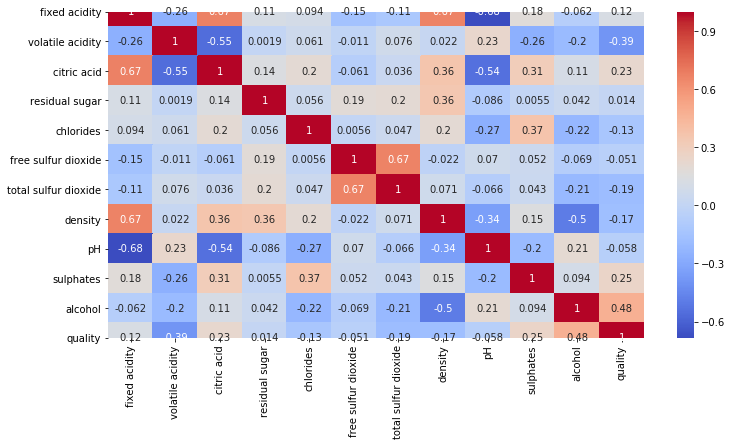

In [11]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),cmap='coolwarm', annot=True)

Wine quality has the highest correlation with alcohol. Other relation degrees are very low with each other,such as citric acid,free_sulfur_dioxide, sulphates and pH. 
Quality also has a low negative correlation with density,volatile acidity, chlorides, total_sulfur_dioxide and residual_sugar.

In [12]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

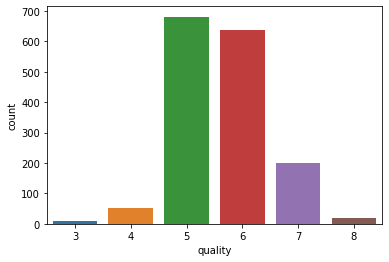

In [13]:
sns.countplot(x='quality', data=df)

** **
### EDA on Wine DataSet

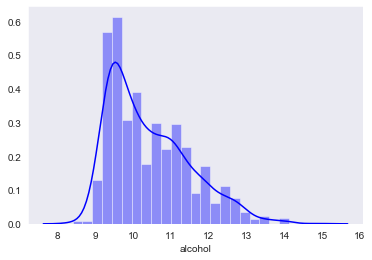

In [14]:
sns.set_style('dark')
sns.distplot(df['alcohol'],bins=25,kde=True,color='b')
plt.ioff()

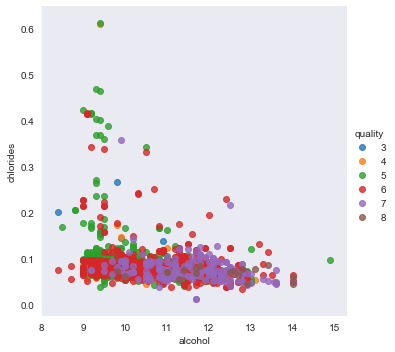

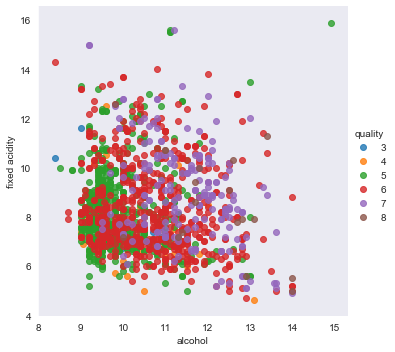

In [15]:
sns.lmplot(x='alcohol',y='chlorides',data=df,fit_reg=False,hue='quality')
plt.ioff()
sns.lmplot(x='alcohol',y='fixed acidity',data=df,fit_reg=False,hue='quality')
plt.ioff()

In [16]:
print(df['alcohol'].quantile(0.1))
print(df['alcohol'].quantile(0.5))
print(df['alcohol'].quantile(0.9))
print(df['alcohol'].quantile(0.99))

9.3
10.2
12.0
13.4


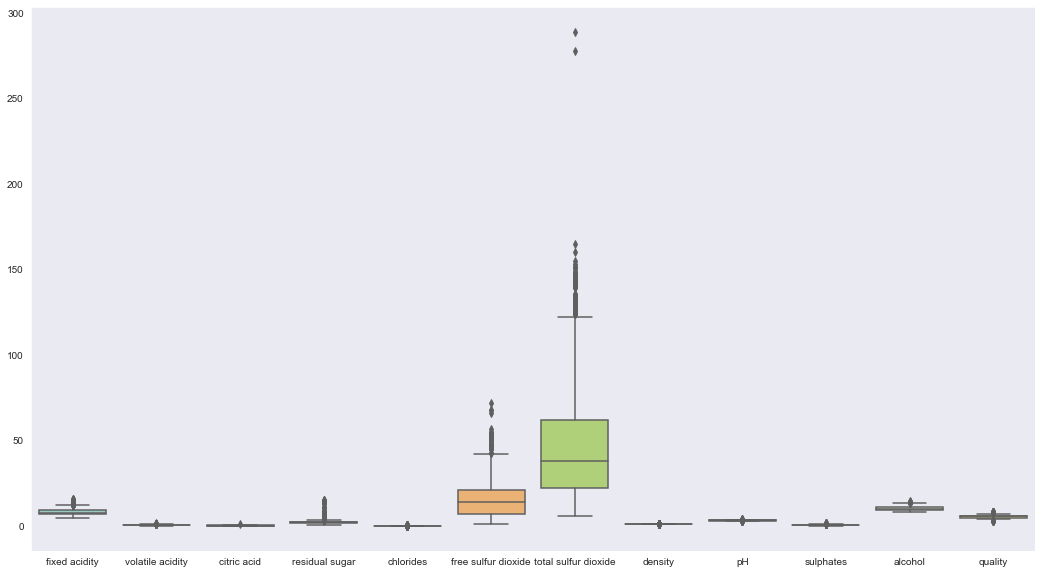

In [17]:
plt.figure(figsize=(18,10))
sns.boxplot(data=df,palette='Set3')
plt.ioff()

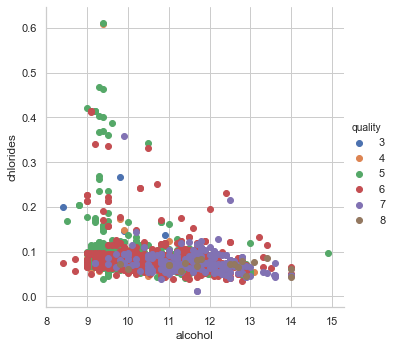

In [18]:
sns.set()
sns.set_style('whitegrid')
sns.FacetGrid(df, hue='quality', height=5) \
    .map(plt.scatter, 'alcohol', 'chlorides') \
    .add_legend();
plt.show()

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='hist')` instead of `Series.plot('hist',)`.
  This is separate from the ipykernel package so we can avoid doing imports until


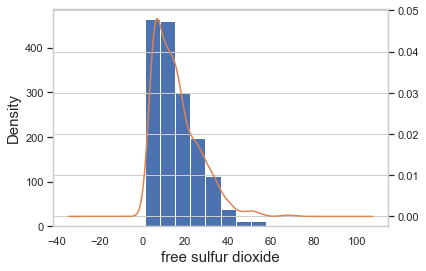

In [19]:
plt.xlabel('free sulfur dioxide',fontsize=15)
plt.ylabel('Frq',fontsize=15)
ax = df['free sulfur dioxide'].plot('hist')
df['free sulfur dioxide'].plot(kind='kde', ax=ax, secondary_y=True)
plt.show()

### Split Data into Train & Test set

In [20]:
# i choose 'total sulfur dioxide' because it has 0.7 corrolation with type 
# and 'free sulfur dioxide' because it has 0.47 corrolation with type
X = df[['alcohol', 'chlorides','density','total sulfur dioxide']]
y = df['quality']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Feature Scaling

In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test  = sc.transform(X_test)

** **
## Build a Predictive Model using ML Algorithms
-- --

### KNearestClassifier

In [23]:
from sklearn.neighbors import KNeighborsClassifier

In [24]:
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=50, p=2,
                     weights='uniform')

In [25]:
knn_pred=knn.predict(X_test)

In [26]:
from sklearn.metrics import accuracy_score

print('Accuracy = ',round(accuracy_score(y_test,knn_pred),4) *100, '%')

Accuracy =  53.22 %


In [27]:
import sklearn.metrics as metrics
score=[]
for k in range(1,100):
    knn=KNeighborsClassifier(n_neighbors=k,weights='uniform')
    knn.fit(X_train,y_train)
    predKNN=knn.predict(X_test)
    accuracy=metrics.accuracy_score(predKNN,y_test)
    score.append(accuracy*100)
    print ('k = ',k,'-> accuracy : ',accuracy)

k =  1 -> accuracy :  0.5700757575757576
k =  2 -> accuracy :  0.5284090909090909
k =  3 -> accuracy :  0.5151515151515151
k =  4 -> accuracy :  0.5321969696969697
k =  5 -> accuracy :  0.5303030303030303
k =  6 -> accuracy :  0.5454545454545454
k =  7 -> accuracy :  0.5303030303030303
k =  8 -> accuracy :  0.5492424242424242
k =  9 -> accuracy :  0.5265151515151515
k =  10 -> accuracy :  0.5416666666666666
k =  11 -> accuracy :  0.5284090909090909
k =  12 -> accuracy :  0.5397727272727273
k =  13 -> accuracy :  0.5435606060606061
k =  14 -> accuracy :  0.5454545454545454
k =  15 -> accuracy :  0.5454545454545454
k =  16 -> accuracy :  0.5378787878787878
k =  17 -> accuracy :  0.5435606060606061
k =  18 -> accuracy :  0.5321969696969697
k =  19 -> accuracy :  0.5265151515151515
k =  20 -> accuracy :  0.5397727272727273
k =  21 -> accuracy :  0.5435606060606061
k =  22 -> accuracy :  0.5492424242424242
k =  23 -> accuracy :  0.5511363636363636
k =  24 -> accuracy :  0.5454545454545454
k

**KNN Algorithm gives accuracy arround 53.78% on evaluation test dataset**
** **

## Decision Tree

In [28]:
from sklearn import tree
from sklearn import preprocessing
df = pd.read_csv('winequality-red.csv',sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [29]:
X = df.drop('quality', axis=1)
y = df['quality']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)

In [31]:
X_train_scaled = preprocessing.scale(X_train)
print(X_train_scaled)

[[-0.5388587   0.63456976 -1.04817271 ... -0.05577306 -0.45285527
  -0.78001583]
 [ 0.32516171 -1.67999946  1.06254227 ...  0.52627927 -0.74035745
  -0.96715525]
 [ 0.0371549   2.81136699 -0.63632589 ...  0.39693431 -0.9703592
  -0.4993067 ]
 ...
 [-0.65406143  0.74478734 -1.25409612 ...  1.43169402 -0.51035571
  -0.68644612]
 [-1.05727095  0.02837306 -1.09965356 ...  0.46160679  0.98465563
  -0.12502786]
 [-1.46048048  2.67359502  1.98919763 ...  2.27243628 -0.3378544
   0.99780866]]


In [32]:
model = tree.DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [33]:
confidence = model.score(X_test, y_test)
print("\nThe confidence score:\t")
print(confidence)


The confidence score:	
0.65625


**Decision Tree Classifier give better performance than KNN. Decision Tree gives accuracy upto 62%.**

In [34]:
y_pred = model.predict(X_test)

In [35]:
#converting the numpy array to list
x=np.array(y_pred).tolist()

#printing first 5 predictions
print("\nThe prediction:")
for i in range(0,5):
    print(x[i])
    
#printing first five expectations
print("\nThe expectation:\n")
print (y_test.head())


The prediction:
5
5
7
6
6

The expectation:

1563    5
605     6
420     7
1390    6
280     6
Name: quality, dtype: int64


** **
### For White-Type Wine

In [36]:
df = pd.read_csv('winequality-white.csv',sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [37]:
X = df.drop('quality', axis=1)
y = df['quality']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)

In [39]:
X_train_scaled = preprocessing.scale(X_train)
print(X_train_scaled)

[[ 8.81155351e-01  1.09884333e+00 -9.33411955e-01 ... -1.05275216e+00
  -1.76348750e+00 -2.52977751e-01]
 [-1.48234617e+00 -1.18177824e+00 -5.21705282e-01 ...  6.07988916e-01
  -1.05882091e+00 -3.34332073e-01]
 [ 1.23568058e+00 -1.90203647e-01 -2.76572732e-02 ... -1.71704859e+00
  -1.82101819e-03 -8.22458007e-01]
 ...
 [ 2.06290611e+00 -1.18177824e+00  3.84049400e-01 ... -1.58418931e+00
  -8.82654261e-01 -2.52977751e-01]
 [-8.91470787e-01 -1.28093570e+00 -3.57022612e-01 ...  2.73373749e+00
  -4.42237640e-01  7.24395387e-02]
 [ 2.53560641e+00  1.07268732e-01  5.46840615e-02 ... -3.88455731e-01
  -1.77987667e-01  7.24395387e-02]]


In [40]:
model = tree.DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [41]:
confidence = model.score(X_test, y_test)
print("\nThe confidence score:")
print(confidence)


The confidence score:
0.6193877551020408


**For Wine Type white Decision Tree gives 62% accuracy same as for of red wine.**
ASSUMATION: Type of wine not import in quality of wine.
**All parammeters of Dataset are import which are common to both. only Citric Acid is not important because it has large corelation with other features as derived in EDA Steps.**
** **

In [42]:
y_pred = model.predict(X_test)

In [43]:
#converting the numpy array to list
x=np.array(y_pred).tolist()

#printing first 5 predictions
print("\nThe prediction:\n")
for i in range(0,5):
    print(x[i])
    
#printing first five expectations
print("\nThe expectation:\n")
print (y_test.head())


The prediction:

6
6
5
6
6

The expectation:

4047    6
2672    7
2303    5
2630    6
750     6
Name: quality, dtype: int64


In [44]:
wine = pd.read_csv('winequality-white.csv',sep=';')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [45]:
print(wine['quality'])

0       6
1       6
2       6
3       6
4       6
       ..
4893    6
4894    5
4895    6
4896    7
4897    6
Name: quality, Length: 4898, dtype: int64


### Preprocessing Data for performing Machine learning algorithms

In [46]:
#1 - Bad
#2 - Average
#3 - Excellent
#This will be split in the following way. 
#1,2,3 --> Bad
#4,5,6,7 --> Average
#8,9,10 --> Excellent
#Create an empty list called Reviews
reviews = []
for i in wine['quality']:
    if i >= 1 and i <= 3:
        reviews.append('1')
    elif i >= 4 and i <= 7:
        reviews.append('2')
    elif i >= 8 and i <= 10:
        reviews.append('3')
wine['Reviews'] = reviews

In [47]:
wine['Reviews'].value_counts()

2    4698
3     180
1      20
Name: Reviews, dtype: int64

In [48]:
x = wine.iloc[:,:11]
y = wine['Reviews']

In [49]:

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [50]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

** **
Proceed with Modelling. We will use the following algorithms

    Logistic Regression
    Decision Trees
    Random Forests
    SVM



**1. Logistic Regression**

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
lr = LogisticRegression()
lr.fit(x_train, y_train)
lr_predict = lr.predict(x_test)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [52]:
#print confusion matrix and accuracy score
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print(lr_conf_matrix)
print(lr_acc_score*100)

[[   0    6    1]
 [   0 1407    0]
 [   0   56    0]]
95.71428571428572


In [53]:
#converting the numpy array to list
x=np.array(y_pred).tolist()

#printing first 5 predictions
print("\nThe prediction:\n")
for i in range(0,5):
    print(x[i])
    
#printing first five expectations
print("\nThe expectation:\n")
print (y_test.head())


The prediction:

6
6
5
6
6

The expectation:

3782    2
2359    2
1976    2
3099    2
4428    2
Name: Reviews, dtype: object


**2. Decision Tree**

In [54]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt_predict = dt.predict(x_test)

In [55]:
#print confusion matrix and accuracy score
dt_conf_matrix = confusion_matrix(y_test, dt_predict)
dt_acc_score = accuracy_score(y_test, dt_predict)
print(dt_conf_matrix)
print(dt_acc_score*100)

[[   1    6    0]
 [   5 1368   34]
 [   0   37   19]]
94.42176870748298


In [56]:
#converting the numpy array to list
x=np.array(y_pred).tolist()

#printing first 5 predictions
print("\nThe prediction:")
for i in range(0,5):
    print(x[i])
    
#printing first five expectations
print("\nThe expectation:")
print (y_test.head())


The prediction:
6
6
5
6
6

The expectation:
3782    2
2359    2
1976    2
3099    2
4428    2
Name: Reviews, dtype: object


**3. Ensemble Model**

In [57]:

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
rf_predict=rf.predict(x_test)


C:\Users\hp\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [58]:
#print confusion matrix and accuracy score
rf_conf_matrix = confusion_matrix(y_test, rf_predict)
rf_acc_score = accuracy_score(y_test, rf_predict)
print(rf_conf_matrix)
print(rf_acc_score*100)


[[   0    7    0]
 [   0 1406    1]
 [   0   41   15]]
96.66666666666667


In [59]:
#converting the numpy array to list
x=np.array(y_pred).tolist()

#printing first 5 predictions
print("\nThe prediction:")
for i in range(0,5):
    print(x[i])
    
#printing first five expectations
print("\nThe expectation:")
print (y_test.head())


The prediction:
6
6
5
6
6

The expectation:
3782    2
2359    2
1976    2
3099    2
4428    2
Name: Reviews, dtype: object


**4. SVM Linear Kernel**

In [60]:
from sklearn import svm 
#Create a svm Classifier 
clf = svm.SVC(kernel='linear') # Linear Kernel 

In [61]:
clf.fit(x_train, y_train) 
 
#Predict the response for test dataset 
y_pred = clf.predict(x_test)

In [62]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9571428571428572


In [63]:
#converting the numpy array to list
x=np.array(y_pred).tolist()

#printing first 5 predictions
print("\nThe prediction:")
for i in range(0,5):
    print(x[i])
    
#printing first five expectations
print("\nThe expectation:")
print (y_test.head())


The prediction:
2
2
2
2
2

The expectation:
3782    2
2359    2
1976    2
3099    2
4428    2
Name: Reviews, dtype: object


** *
## Conclusion

Afer the all steps performing on our problem statement, we conclude that
* **Type** of wine is not important to predict target.
* **All the feature** vectors of dataset important to predict quality of data.
* Alcohal, fixed acidity, sulfur dioxide, density are major predictors as observed during data analysis.
* For Red-wine, **Desicion Tree** technique gives 61% accuracy .
* For White-wine, **Desion Tree** technique gives 62% accuracy . 
** ** 
* To get more accurate model performed binning of target variable as 
    * 1,2,3 --> Bad 
    * 4,5,6,7 --> Average 
    * 8,9,10 --> Excellent
* After above preprocessing step,
    * Logistic Regression --> Accuracy: 96.46
    * Decision Tree --> Accuracy: 94.14
    * Random Forest --> 97
    * SVM --> 95.85
    
* **Randow Forest** Algorithm give best case accuracy.
** *   
** *